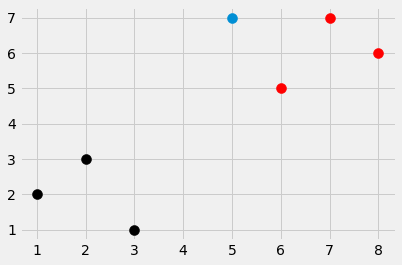

In [15]:
#Part 1: KNN Algorithm
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]] , 'r':[[6,5],[7,7],[8,6]]}

new_features= [5,7]

for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1],s=100)

plt.show()

In [17]:
#Part 2: KNN Algorithm
def k_nearest_neighbors(data, predict, k = 3):
  if len(data)>k:
    warnings.warn('K is set to a value that is less than the number of voting groups!')

  distances = []

  for group in data:
    for features in data[group]:
      #euclidean_distance = np.sqrt( np.sum(( np.array(features) - np.array(predict))**2) )
      euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict))
      distances.append([ euclidean_distance, group])
  
  votes = [ i[1] for i in sorted(distances) [:k]]

  #print(Counter(votes).most_common(1))
  vote_result = Counter(votes).most_common(1)[0][0]
  confidence = Counter(votes).most_common(1)[0][1] / k
  return vote_result, confidence
result= k_nearest_neighbors(dataset, new_features, k = 3)
print(result)

'''for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1],s=100, color=result)

plt.show()'''

('r', 1.0)


'for i in dataset:\n  for ii in dataset[i]:\n    plt.scatter(ii[0],ii[1], s=100, color=i)\nplt.scatter(new_features[0],new_features[1],s=100, color=result)\n\nplt.show()'

In [18]:
#KNN without scikitlearn using Breast Cancer (Original) dataset

!pip install PyDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import random

data_path='/content/drive/My Drive/Datasets/Breast Cancer (original)/breast-cancer-wisconsin.data.txt'

df= pd.read_csv(data_path)
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)

full_data = df.astype(float).values.tolist() #Converting to float as some values are present as strings

random.shuffle(full_data)

In [20]:
#Separating data into train and test set

test_size = 0.2
train_set = { 2:[], 4:[] }
test_set = { 2:[], 4:[] }

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [21]:
#Populating the dictionries
for i in train_data:
  train_set[i[-1]].append(i[:-1]) 

for i in test_data:
  test_set[i[-1]].append(i[:-1]) 

In [22]:
#Calculating results

correct = 0
total = 0
for group in test_set:
  for data in test_set[group]:
    #vote = k_nearest_neighbors(train_set, data, k=5) #Accuracy:  0.9568345323741008
    vote, confidence = k_nearest_neighbors(train_set, data, k=25) #Accuracy:  0.9856115107913669
    #Increasing value of k to much larger numbers is leading to decrease in accuracy
    if group == vote:
      correct += 1
    total += 1

print("Accuracy: ",correct/total)
print("Confidence: ",confidence)

Accuracy:  0.9640287769784173
Confidence:  0.96


In [23]:
#Accuracy = Did we get the classification right?
#Confidence = How confident are we in our prediction?
